## Section2 Project
#### **유해물질 포함량에 따른 물의 안전성 문제**

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
df=pd.read_csv('/content/gdrive/MyDrive/waterQuality1.csv')
df.head().T

,0,1,2,3,4
aluminium,1.65,2.32,1.01,1.36,0.92
ammonia,9.08,21.16,14.02,11.33,24.33
arsenic,0.04,0.01,0.04,0.04,0.03
barium,2.85,3.31,0.58,2.96,0.2
cadmium,0.007,0.002,0.008,0.001,0.006
chloramine,0.35,5.28,4.24,7.23,2.67
chromium,0.83,0.68,0.53,0.03,0.69
copper,0.17,0.66,0.02,1.66,0.57
flouride,0.05,0.9,0.99,1.08,0.61
bacteria,0.2,0.65,0.05,0.71,0.13


#### **데이터 전처리**


- aluminium(알루미늄) : 2.8 이상이면 위험하다
- ammonia(암모니아) : 32.5 이상이면 위험하다
- arsenic(비소) : 0.01 이상이면 위험하다
- barium(바륨) : 2 이상이면 위험하다
- cadmium(카드뮴) : 0.005 이상이면 위험하다
- chloramine(클로라민) : 4 이상이면 위험하다
- chromium(크로뮴) : 0.1 이상이면 위험하다
- copper(구리) : 1.3 이상이면 위험하다
- flouride(플루오린화물) : 1.5 이상이면 위험하다
- bacteria(박테리아) : 0 이상이면 위험하다
- viruses(바이러스) : 0 이상이면 위험하다
- lead(납) : 0.015 이상이면 위험하다
- nitrates(질산염) : 10 이상이면 위험하다
- nitrites(아질산염) : 1 이상이면 위험하다
- mercury(수은) : 0.002 이상이면 위험하다
- perchlorate(과염소산염) : 56 이상이면 위험하다
- radium(라듐) : 5 이상이면 위험하다
- selenium(셀레늄) : 0.5 이상이면 위험하다
- silver(은) : 0.1 이상이면 위험하다
- uranium(우라늄) : 0.3 이상이면 위험하다
- is_safe : 0-not safe, 1-safe

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [16]:
df.ammonia= df['ammonia'].replace('#NUM!', np.nan)
df.ammonia= df['ammonia'].astype('float')
df.is_safe= df['is_safe'].replace('#NUM!', np.nan)
df.is_safe= df['is_safe'].astype('float')
df.dtypes

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe        float64
dtype: object

In [17]:
df.shape

(7999, 21)

In [18]:
df.isnull().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

In [19]:
df= df.dropna(axis=0)
df.shape

(7996, 21)

In [20]:
df.duplicated().sum()

0

#### **EDA**

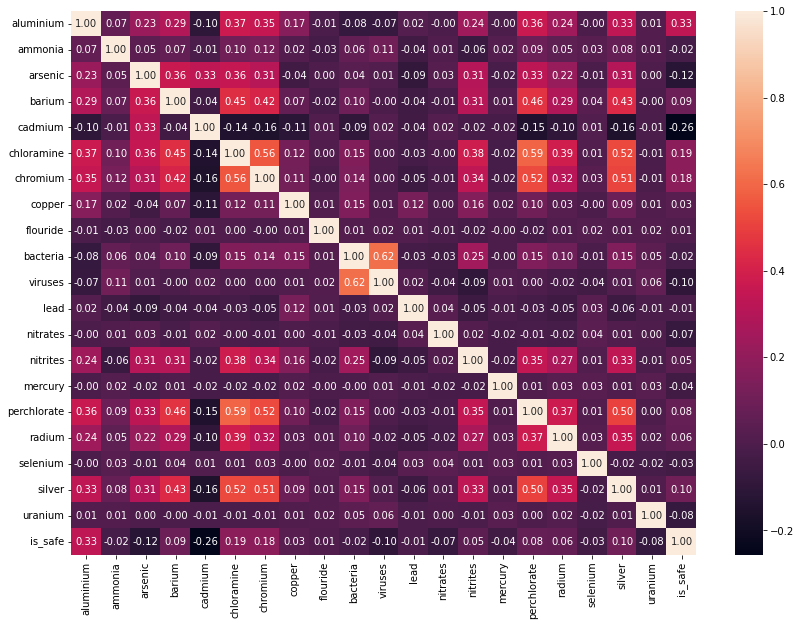

In [21]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

과염소산염(perchlorate)과 클로라민(chloramine)의 상관관계가 0.59로 가장 높은 상관관계를 가지고 있다.

In [22]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


타겟 데이터의 비율 
 0.0    0.885943
1.0    0.114057
Name: is_safe, dtype: float64


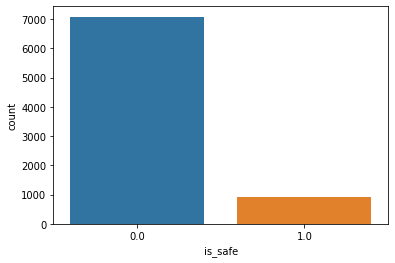

In [23]:
y= df['is_safe']
print("타겟 데이터의 비율 \n", y.value_counts(normalize=True))   #타겟데이터 범주의 비율
##is_safe=0: not safe, is_safe=1: safe

%matplotlib inline
sns.countplot(x=y)

#### **Modeling**

- **훈련, 검증, 테스트 데이터셋 분리**

In [24]:
from sklearn.model_selection import train_test_split

target='is_safe'
X= df.drop(target, axis=1)
y= df[target]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=42, stratify= y)
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size= 0.2, random_state=42, stratify= y_train)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

(5116, 20) (5116,) (1280, 20) (1280,) (1600, 20) (1600,)


In [25]:
y_train.value_counts(normalize=True)

0.0    0.885848
1.0    0.114152
Name: is_safe, dtype: float64

- **scaling**

In [26]:
from sklearn.preprocessing import StandardScaler
numeric= X_train.dtypes[X_train.dtypes != "object"].index

scaler= StandardScaler()
X_train[numeric]= scaler.fit_transform(X_train[numeric])
X_val[numeric]= scaler.transform(X_val[numeric])
X_test[numeric]= scaler.transform(X_test[numeric])

- **기준모델 (baseline model)**

In [27]:
baseline= y_train.mode()[0]
y_pred_base= [baseline] * len(y_train)
y_pred_base_val= [baseline] * len(y_val)

In [28]:
#기준모델에서의 정확도(Accuracy)
from sklearn.metrics import accuracy_score

print("training accuracy:", accuracy_score(y_train, y_pred_base))
print("validation accuracy:", accuracy_score(y_val, y_pred_base_val))

training accuracy: 0.8858483189992181
validation accuracy: 0.8859375


Text(0.5, 1.0, 'Baseline Confusion Matrix, n=1280')

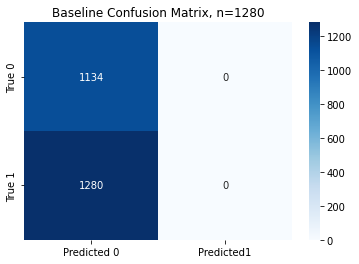

In [29]:
#기준모델에서의 Confusion Matrix
y_true0= y_val.value_counts()[0]
y_true1= y_val.value_counts()[1]
fn= len(y_pred_base_val)
base= pd.DataFrame(index=['True 0','True 1'], data={'Predicted 0':[y_true0, fn], 'Predicted1':[0, 0]})

sns.heatmap(base, cmap=plt.cm.Blues, annot=True, fmt='d')
plt.title(f'Baseline Confusion Matrix, n={len(y_val)}')

기준모델은 모든 샘플을 0으로 예측했고 물이 안전한지에 대한 예측을 하지 못했으므로, 기준모델이 좋은 예측모델이라고 할 수 없다.

- FP : 물이 안전한데 안전하지 않다고 예측하는 것
- FN : 물이 안전하지 않은데 안전하다고 예측하는 것
- FN이 FP보다 더 치명적인 오류일 것이다. -> 재현율이 정밀도보다 중요하다.

In [30]:
#기준모델의 분류 평가지표
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

print(classification_report(y_val, y_pred_base_val))

accuracy_base = accuracy_score(y_val, y_pred_base_val)
precision_base = precision_score(y_val, y_pred_base_val)
recall_base = recall_score(y_val, y_pred_base_val)
f1_base = f1_score(y_val, y_pred_base_val)

print(f'accuracy(정확도) of baseline: {accuracy_base.round(2)}')
print(f'precision(정밀도) of baseline: {precision_base.round(2)}')
print(f'recall(재현율) of baseline: {recall_base.round(2)}')
print(f'f1 score of baseline: {f1_base.round(2)}')

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      1134
         1.0       0.00      0.00      0.00       146

    accuracy                           0.89      1280
   macro avg       0.44      0.50      0.47      1280
weighted avg       0.78      0.89      0.83      1280

accuracy(정확도) of baseline: 0.89
precision(정밀도) of baseline: 0.0
recall(재현율) of baseline: 0.0
f1 score of baseline: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

- **logistic regression model**

In [31]:
from sklearn.linear_model import LinearRegression, LogisticRegression

logi= LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced')
#logi= LogisticRegression(max_iter=10000, random_state=42)
logi.fit(X_train, y_train)
y_val_logi_pred= logi.predict(X_val)

print("logistic train accuracy:", logi.score(X_train, y_train))
print("logistic validation accuracy (검증 정확도):", accuracy_score(y_val, y_val_logi_pred))

logistic train accuracy: 0.8037529319781079
logistic validation accuracy (검증 정확도): 0.81171875


로지스틱 회귀모델의 예측 정확도는 기준모델의 예측 정확도보다 떨어졌다.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix, n=1280')

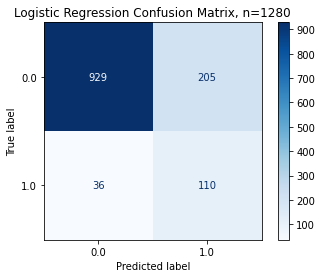

In [32]:
from sklearn.metrics import plot_confusion_matrix

pcm= plot_confusion_matrix(logi, X_val, y_val, cmap=plt.cm.Blues)
plt.title(f'Logistic Regression Confusion Matrix, n={len(y_val)}')

confusion matrix를 보면 관심타겟인 1을 기준모델에서보다 많이 맞추고 있으므로, 로지스틱 회귀모델이 기준모델보다 좋은 모델이라고 할 수 있다.

In [33]:
print(classification_report(y_val, y_val_logi_pred))

accuracy = accuracy_score(y_val, y_val_logi_pred)
precision = precision_score(y_val, y_val_logi_pred)
recall = recall_score(y_val, y_val_logi_pred)
f1 = f1_score(y_val, y_val_logi_pred)

print(f'accuracy(정확도) of logistic regression: {accuracy.round(2)}')
print(f'precision(정밀도) of logistic regression: {precision.round(2)}')
print(f'recall(재현율) of logistic regression: {recall.round(2)}')
print(f'f1 score of logistic regression: {f1.round(2)}')

              precision    recall  f1-score   support

         0.0       0.96      0.82      0.89      1134
         1.0       0.35      0.75      0.48       146

    accuracy                           0.81      1280
   macro avg       0.66      0.79      0.68      1280
weighted avg       0.89      0.81      0.84      1280

accuracy(정확도) of logistic regression: 0.81
precision(정밀도) of logistic regression: 0.35
recall(재현율) of logistic regression: 0.75
f1 score of logistic regression: 0.48


- **재현율을 높이는 방법**

False    965
True     315
dtype: int64

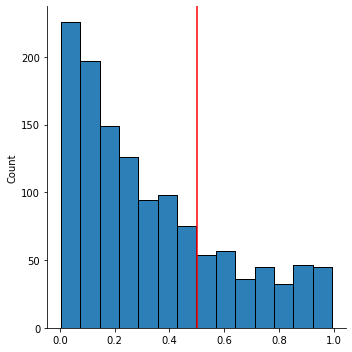

In [34]:
y_pred_proba= logi.predict_proba(X_val)[:,1]
sns.displot(y_pred_proba)

threshold= 0.5
y_pred= y_pred_proba > threshold
ax= sns.histplot(y_pred_proba)
ax.axvline(threshold, color='r')

pd.Series(y_pred).value_counts()

              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84      1134
         1.0       0.29      0.85      0.44       146

    accuracy                           0.75      1280
   macro avg       0.63      0.79      0.64      1280
weighted avg       0.90      0.75      0.79      1280

precision(정밀도): 0.29
recall(재현율): 0.85


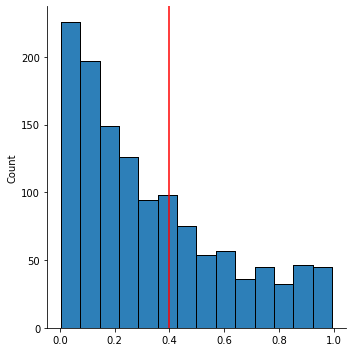

In [35]:
#임계값(threshold) 조정하기
sns.displot(y_pred_proba)

threshold= 0.4
y_pred= y_pred_proba > threshold
ax= sns.histplot(y_pred_proba)
ax.axvline(threshold, color='r')

print(classification_report(y_val, y_pred))

precision_02 = precision_score(y_val, y_pred)
recall_02 = recall_score(y_val, y_pred)

print(f'precision(정밀도): {precision_02.round(2)}')
print(f'recall(재현율): {recall_02.round(2)}')

              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91      1134
         1.0       0.39      0.61      0.47       146

    accuracy                           0.84      1280
   macro avg       0.67      0.74      0.69      1280
weighted avg       0.88      0.84      0.86      1280

precision(정밀도): 0.39
recall(재현율): 0.61


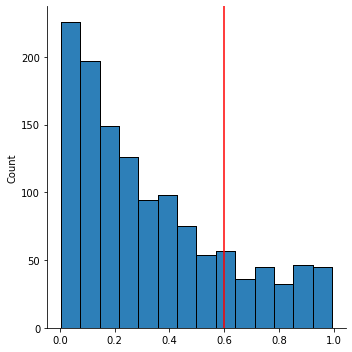

In [36]:
sns.displot(y_pred_proba)

threshold= 0.6
y_pred= y_pred_proba > threshold
ax= sns.histplot(y_pred_proba)
ax.axvline(threshold, color='r')

print(classification_report(y_val, y_pred))

precision_015 = precision_score(y_val, y_pred)
recall_015 = recall_score(y_val, y_pred)

print(f'precision(정밀도): {precision_015.round(2)}')
print(f'recall(재현율): {recall_015.round(2)}')

- **ROC curve를 이용해 최적의 임계값 찾기**
-- TPR- FPR 이 최대가 되는 지점이 최적의 임계값이다. (TPR 최대, FPR 최소)

In [37]:
from sklearn.metrics import roc_curve

# roc_curve(타겟값, prob of 1)

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

roc = pd.DataFrame({
    'FPR(Fall-out)': fpr, 
    'TPR(Recall)': tpr, 
    'Threshold': thresholds
})

idx: 145 , threshold: 0.45298789174896464


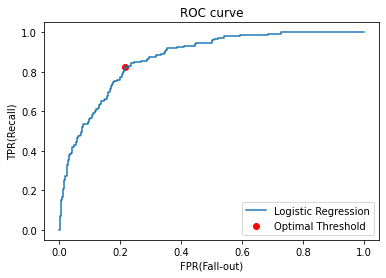

In [38]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('idx:', optimal_idx, ', threshold:', optimal_threshold)

optimal_fpr = roc[roc['Threshold'] == optimal_threshold]['FPR(Fall-out)']
optimal_tpr = roc[roc['Threshold'] == optimal_threshold]['TPR(Recall)']

plt.plot(fpr, tpr, label='Logistic Regression')

plt.scatter(optimal_fpr, optimal_tpr, color = 'red', alpha=1, label='Optimal Threshold')
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)')
plt.legend();

In [39]:
y_pred_optimal = y_pred_proba >= optimal_threshold
print(classification_report(y_val, y_pred_optimal))

              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87      1134
         1.0       0.33      0.82      0.47       146

    accuracy                           0.79      1280
   macro avg       0.65      0.80      0.67      1280
weighted avg       0.90      0.79      0.82      1280



최적의 임계값 0.452를 사용했을 때, 재현율은 0.82이다.

- **AUC**

In [40]:
from sklearn.metrics import roc_auc_score

auc= roc_auc_score(y_val, y_pred_proba)
print(f"Logistic Regression의 auc score: {auc}")

Logistic Regression의 auc score: 0.8697301345703172


로지스틱 회귀모델의 AUC score가 0.869이므로, Positive sample의 확률이 Negative sample의 확률보다 클 확률이 0.869라고 할 수 있다.